In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import scipy.special
import random
from mpmath import mp
import time
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#AlphaArray = np.load("AlphaDreieckMashgrid_2_149_149.npy")
#BetaArray = np.load("BetaDreieckMashgrid_2_149_149.npy")

beta_initial = np.linspace(0.0001,0.999,300) # np.linspace(0,1,30) for standard accuracy
alpha_initial = np.linspace(0,1,150) 

AlphaArray, BetaArray = np.meshgrid(alpha_initial,beta_initial)


Data1 = np.load("DataDreieckMashgrid92.npy")
Data2 = np.load("DataDreieckMashgrid96.npy")

Datamul = Data1*Data2
print(max(Data1.flatten()))


1.0924990288795852e+56


In [23]:
def Plottit(L_Config_Name,Saveit = False,Logarith = False,Low = -2,High = 2,Low_Log = -10,High_Log = 2,cmap = None,label = True):
    
    Data = np.load("DataDreieckMashgrid{:}.npy".format(L_Config_Name))
    
    Z = Data

    
    if(Logarith == True):
        condlist = [Z!= 0]

        Z = np.select(condlist,[Z],default = 69) #69 just because its bigger than usual integrals and funny.
        Z = np.ma.masked_where(Z == 69,Z)
        Z = np.log(abs(Z))
        Low = Low_Log
        High = High_Log
        
    else:
        Z = np.ma.masked_where(Z == 0,Z)
    
    if(Data.shape[0] == Data.shape[1]):
        if(Data.shape == (400,400)): #This Plotroutine is just useable for my own precalculated Dataformat.

            X = np.load("AlphaDreieckMashgrid6.npy")
            Y = np.load("BetaDreieckMashgrid6.npy")*np.sqrt(3)

        else:

            beta_initial = np.linspace(0.0001,0.999,Data.shape[0]) # np.linspace(0,1,30) for standard accuracy
            alpha_initial = np.linspace(-1,1,Data.shape[1]) 

            X, Y = np.meshgrid(alpha_initial,beta_initial)
            Y = Y*np.sqrt(3)
        
    elif(Data.shape[0] ==  2*Data.shape[1]):
        
        beta_initial = np.linspace(0.0001,0.999,Data.shape[0]) # np.linspace(0,1,30) for standard accuracy
        alpha_initial = np.linspace(0,1,Data.shape[1]) 

        X, Y = np.meshgrid(alpha_initial,beta_initial)
        Y = Y*np.sqrt(3)
        
        X2 = -X
        plt.pcolor(X2,Y,Z,cmap = cmap)
        plt.clim(Low,High)
        
        
    else:
        print("something seems fishy here")
    
            
        
    plt.pcolor(X,Y,Z,cmap = cmap)
    
    plt.clim(Low,High)
    plt.colorbar()

    plt.xlim(-1.1,1.1)
    plt.ylim(-0.05,np.sqrt(3)+0.05)
    
    if(label == True):
        #plt.text(0.4,1.3,r"$\ell$ = {:}".format(L_Config_Name),fontsize = 18)
        plt.text(0.5,1.5,r"$\ell_1$ = 6",fontsize = 18)
        plt.text(0.5,1.1,r"$\ell_3$ = 10",fontsize = 18)
        plt.text(0.5,1.3,r"$\ell_2$ = 12",fontsize = 18)
        
        
    if(Saveit == True):
        if(Logarith == False):
            plt.savefig("Bilder/Dreieck_Mashgrid_l{:}.pdf".format(L_Config_Name),format = "pdf")
        if(Logarith == True):
            plt.savefig("Bilder/Dreieck_Mashgrid_logarith_l{:}.pdf".format(L_Config_Name),format = "pdf")
            
    plt.show()

        

    

        
    


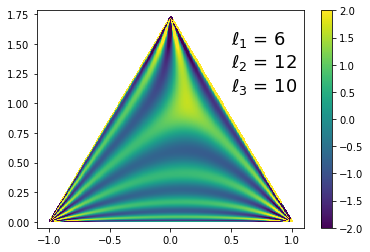

In [24]:
Plottit("_6_12_10",Logarith=False,Saveit = True)


2


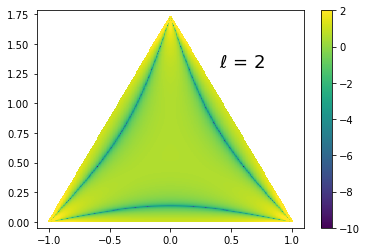

4


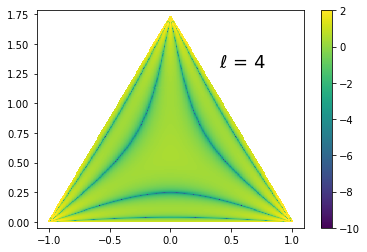

6


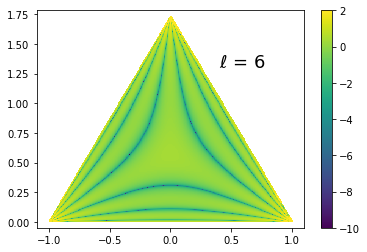

8


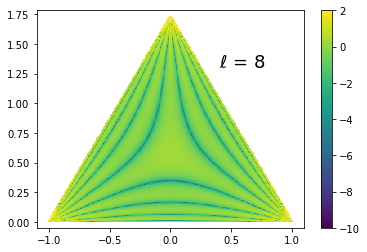

10


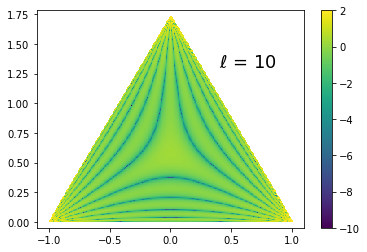

12


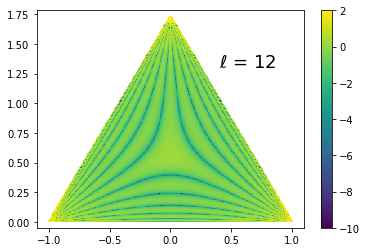

14


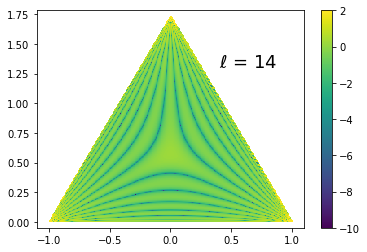

16


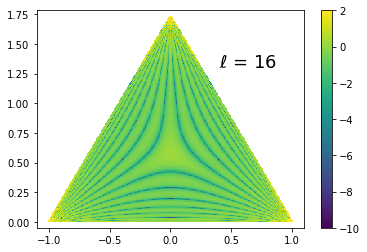

18


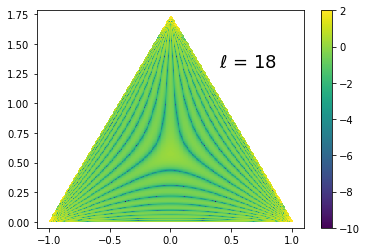

20


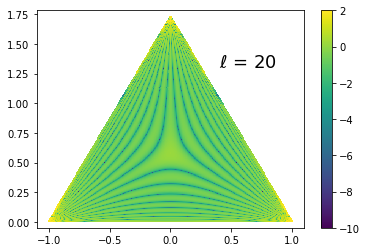

22


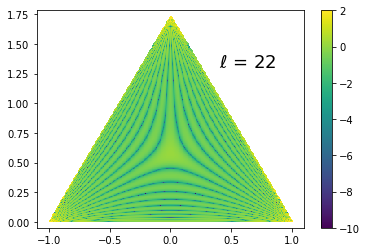

24


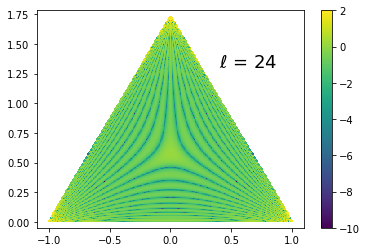

26


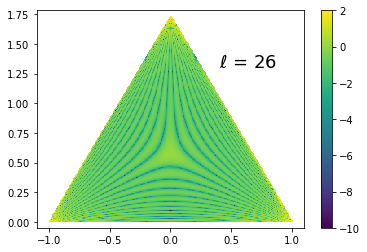

28


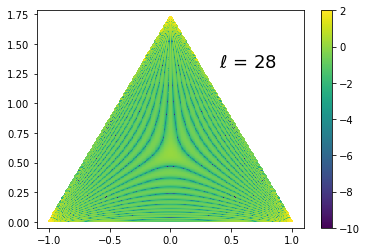

30


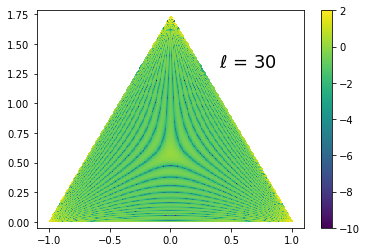

32


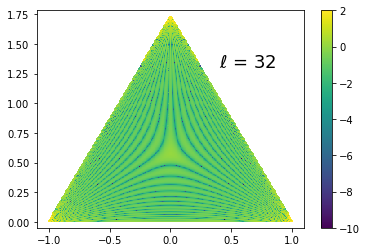

34


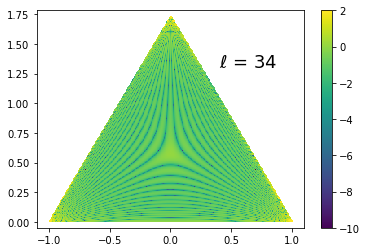

36


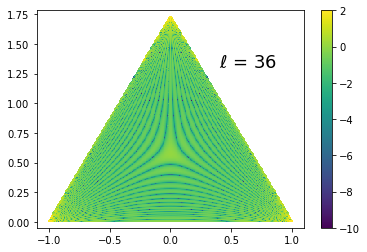

38


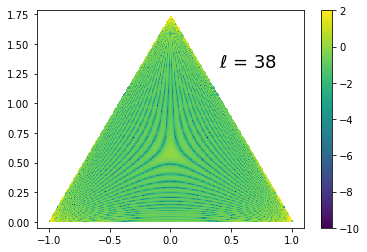

40


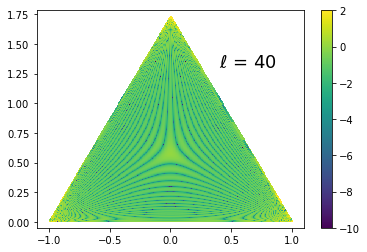

42


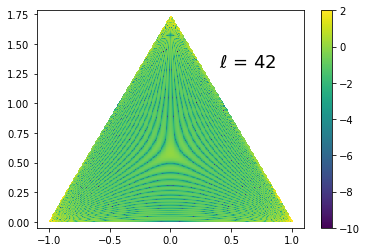

44


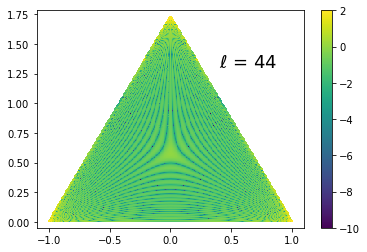

46


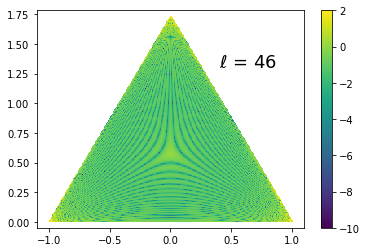

48


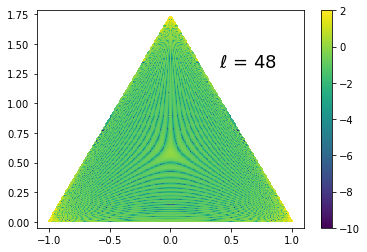

50


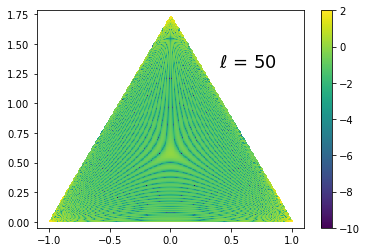

52


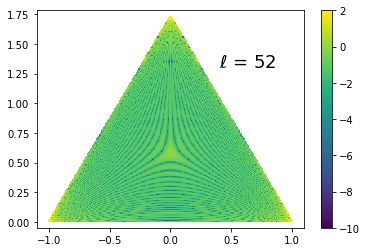

54


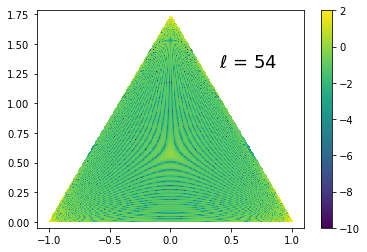

56


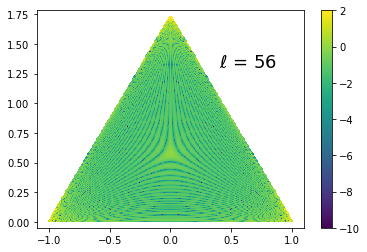

58


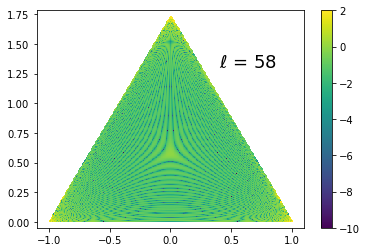

60


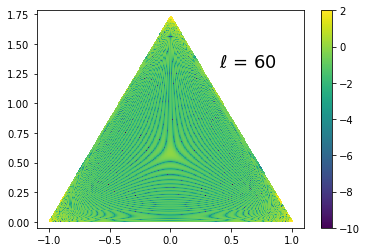

62


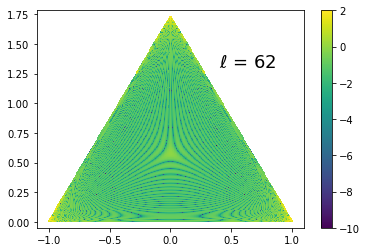

64


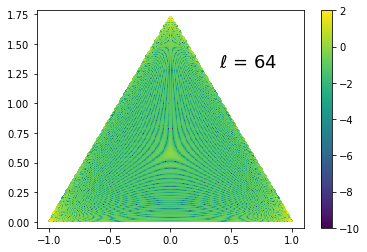

66


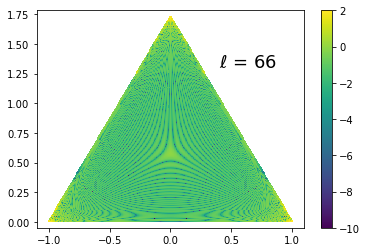

68


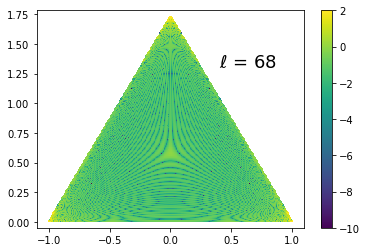

70


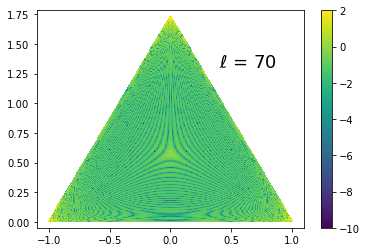

72


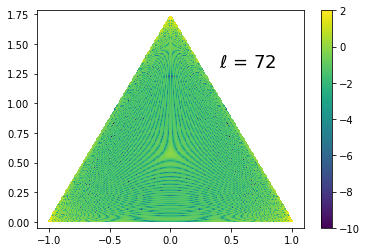

74


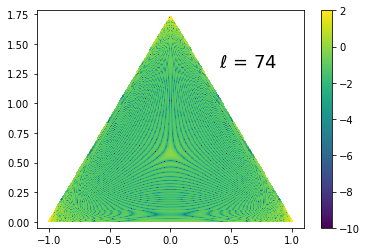

76


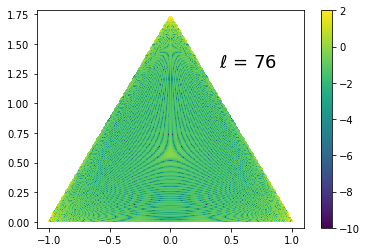

78


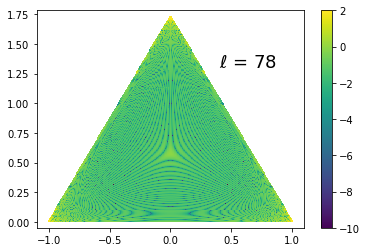

80


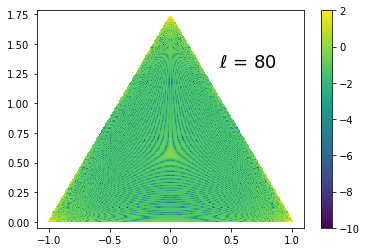

82


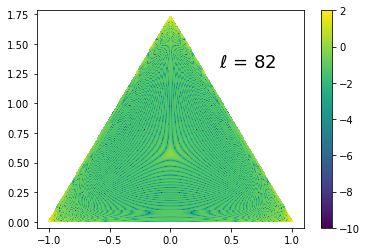

84


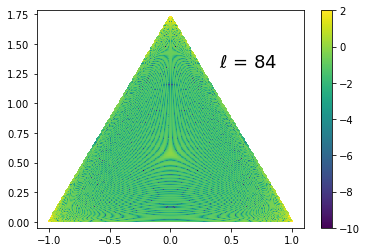

86


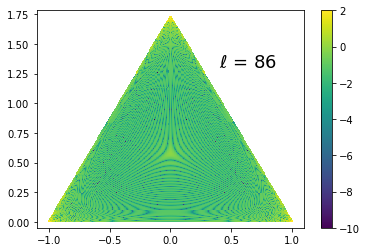

88


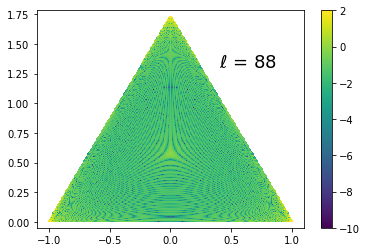

90


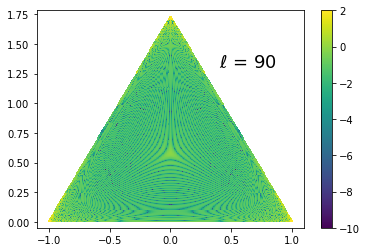

92


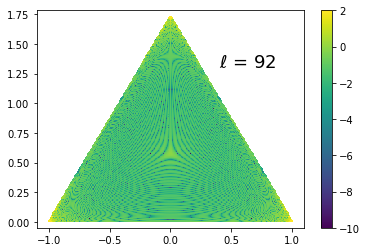

94


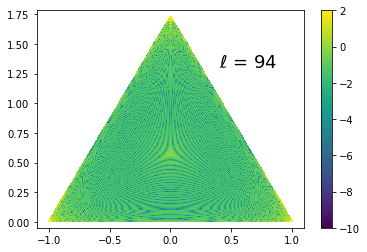

96


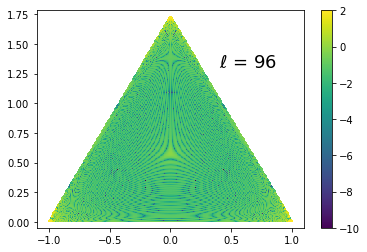

98


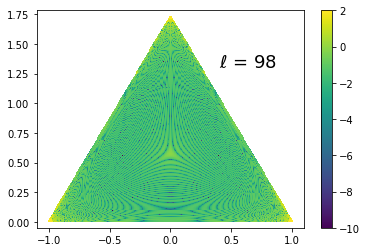

100


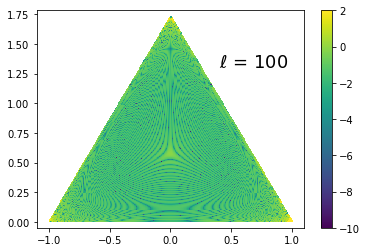

In [8]:
for i in range(2,102,2):
    print(i)
    Plottit(i,Logarith=True,Saveit = True)


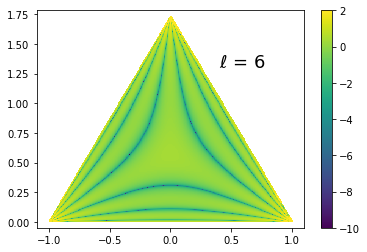

In [4]:
Plottit("6",Logarith=True)

In [79]:
X = np.load("AlphaDreieckMashgridHalf.npy")
Y = np.load("BetaDreieckMashgridHalf.npy")*np.sqrt(3)
Z = Data

X2 = AlphaArray2

print(X.shape)

(300, 150)


In [80]:
Z = Data
condlist = [-3<Z] #for standart plotting. filters the too big values out.
Z = np.select(condlist,[Z])

condlist2 = [Z<3]
Z = np.select(condlist2,[Z])

condlist3 = [Z!= 0]
Z = np.select(condlist3,[Z],default = 0.5)

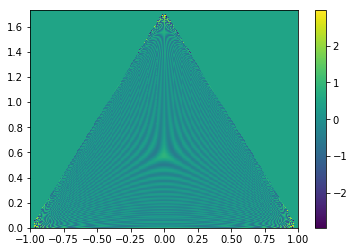

In [81]:
plt.pcolor(X,Y,Z)
plt.pcolor(-X,Y,Z)
plt.colorbar()

###plt.savefig("Dreieck_Mashgrid_l_6_6_12.pdf",format = "pdf")

plt.show()

In [9]:
#for logarithmic plotting.
Z = Data
condlist = [Z!= 0]
Z = np.select(condlist,[Z],default = 0.1)

Z = np.log(abs(Z))

condlist = [-10<Z] #for standart plotting. filters the too big values out.
Z = np.select(condlist,[Z])

condlist2 = [Z<10]
Z = np.select(condlist2,[Z])

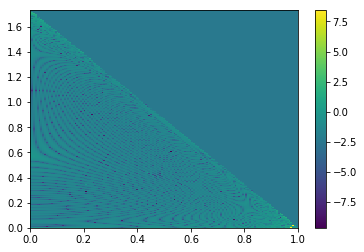

In [10]:
plt.pcolor(X,Y,Z)
plt.pcolor(X2,Y,Z)
plt.colorbar()
plt.savefig("Dreieck_Mashgrid_logarith_l_6_6_12.pdf",format = "pdf")
plt.show()